In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = r'C:\Users\alira\Downloads\projects\PetImages'  
os.listdir(data)

['best_cats_dogs_model.keras', 'dogs_cats_classify.ipynb', 'test', 'train']

In [3]:
test_path = os.path.join(data, "test")
train_path = os.path.join(data, "train")

In [4]:
print(test_path)
print(train_path)
print(os.listdir(test_path))
print(os.listdir(train_path))

C:\Users\alira\Downloads\projects\PetImages\test
C:\Users\alira\Downloads\projects\PetImages\train
['Cat', 'Dog']
['Cat', 'Dog']


In [5]:
os.listdir(os.path.join(train_path, 'Cat'))[0]

'0.jpg'

In [6]:
Cat_cell = 'C:\\Users\\alira\\Downloads\\projects\\PetImages\\train\\Cat\\0.jpg'
from matplotlib.image import imread
imread(Cat_cell).shape

(375, 500, 3)

In [7]:
imread(Cat_cell).max()

255

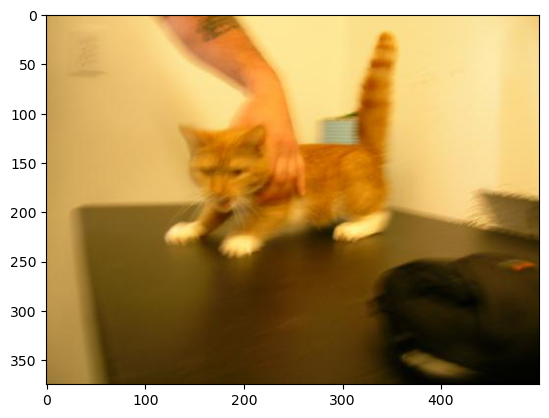

In [8]:
plt.imshow(imread(Cat_cell))

In [9]:
print(len(os.listdir(os.path.join(train_path, 'Cat'))))
print(len(os.listdir(os.path.join(train_path, 'Dog'))))
print(len(os.listdir(os.path.join(test_path, 'Cat'))))
print(len(os.listdir(os.path.join(test_path, 'Dog'))))


9998
9998
2501
2501


In [10]:
import os
from skimage.io import imread
import numpy as np

def analyze_image_dimensions(directory_path):
    dim1 = []
    dim2 = []
    invalid_files = []
    
    for image_filename in os.listdir(directory_path):
        try:
            img_path = os.path.join(directory_path, image_filename)
            img = imread(img_path)
            
            if img is None:
                invalid_files.append(image_filename)
                continue
                
            shape = img.shape
            if len(shape) == 2:  # Grayscale image
                d1, d2 = shape
            elif len(shape) == 3:  # RGB image
                d1, d2, _ = shape
            else:
                invalid_files.append(image_filename)
                continue
                
            dim1.append(d1)
            dim2.append(d2)
            
        except Exception as e:
            invalid_files.append(image_filename)
            print(f"Error processing {image_filename}: {str(e)}")
    
    return dim1, dim2, invalid_files

# Example usage
Cat_path = os.path.join(test_path, 'Cat')
dim1, dim2, invalid_files = analyze_image_dimensions(Cat_path)

# Print statistics
print(f"Number of images analyzed: {len(dim1)}")
print(f"Number of invalid files: {len(invalid_files)}")
if invalid_files:
    print("Invalid files:", invalid_files)

print("\nDimension Statistics:")
print(f"Height (dim1) - Min: {np.min(dim1)}, Max: {np.max(dim1)}, Mean: {np.mean(dim1):.2f}")
print(f"Width (dim2) - Min: {np.min(dim2)}, Max: {np.max(dim2)}, Mean: {np.mean(dim2):.2f}")

Number of images analyzed: 2497
Number of invalid files: 4
Invalid files: ['10125.jpg', '11935.jpg', '2663.jpg', '660.jpg']

Dimension Statistics:
Height (dim1) - Min: 60, Max: 500, Mean: 355.93
Width (dim2) - Min: 75, Max: 500, Mean: 411.02


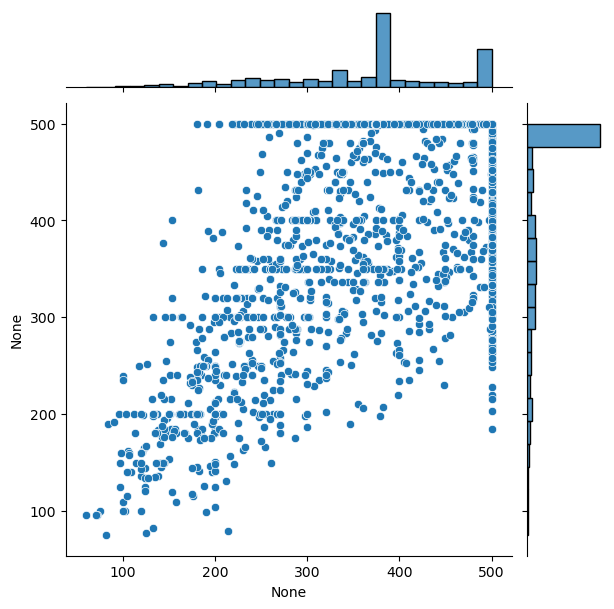

In [11]:
sns.jointplot(x=dim1, y=dim2 , kind='scatter')

In [12]:
image_shape = (356,412,3)

In [14]:
# Image preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.25,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


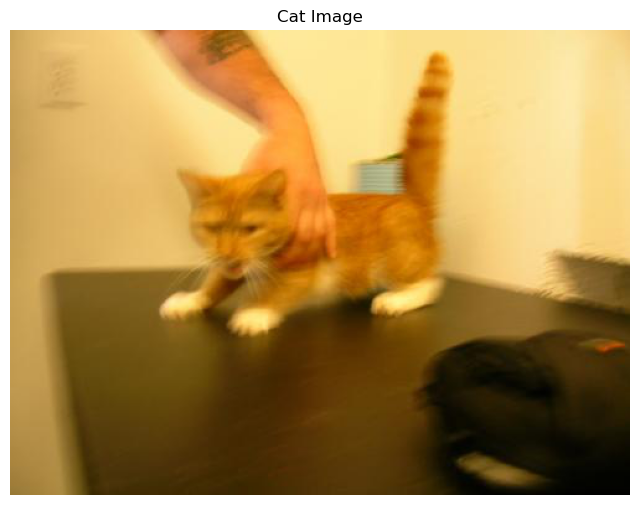

In [15]:
from skimage.io import imread

try:
    # Read the image
    Cat_cell_image = imread(Cat_cell)
    
    # Check if the image was loaded successfully
    if Cat_cell_image is None:
        raise ValueError("Failed to load the image")
    
    # Create a figure with a specific size
    plt.figure(figsize=(8, 8))
    
    # Display the image
    plt.imshow(Cat_cell_image)
    
    # Add a title
    plt.title('Cat Image')
    
    # Remove axis ticks for cleaner display
    plt.axis('off')
    
    # Show the plot
    plt.show()
    
except Exception as e:
    print(f"Error displaying image: {str(e)}")

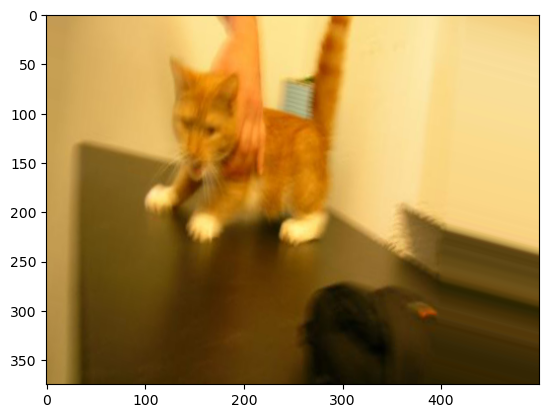

In [16]:
plt.imshow(image_gen.random_transform(Cat_cell_image))

In [17]:
image_gen.flow_from_directory(train_path)


Found 19996 images belonging to 2 classes.


In [18]:
image_gen.flow_from_directory(test_path)


Found 5002 images belonging to 2 classes.


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from tensorflow.keras.layers import BatchNormalization


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=image_shape),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\alira\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 354, 410, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 354, 410, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 177, 205, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 175, 203, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 175, 203, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 87, 101, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 85, 99, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 85, 99, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 49, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 263424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 263424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    33,718,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,813,185 (128.99 MB)

 Trainable params: 33,812,481 (128.98 MB)

 Non-trainable params: 704 (2.75 KB)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
patch_size=16

In [21]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                batch_size=patch_size,
                                                color_mode='rgb',
                                                class_mode='binary')  

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               batch_size=patch_size,
                                               color_mode='rgb',
                                               class_mode='binary',  
                                               shuffle=False)




Found 19996 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [22]:
train_image_gen.class_indices

{'Cat': 0, 'Dog': 1}

In [23]:
from PIL import Image
import os

def verify_images_in_dir(directory):
    for root, _, files in os.walk(directory):
        for fname in files:
            file_path = os.path.join(root, fname)
            try:
                img = Image.open(file_path)
                img.verify()  # Will not load the image data, just checks if it’s broken
            except (IOError, SyntaxError) as e:
                print(f"Corrupted image: {file_path}")
                os.remove(file_path)  # optional: remove the file

verify_images_in_dir("path_to_train_dir")
verify_images_in_dir("path_to_test_dir")


In [24]:

def remove_corrupted_images(directory):
    num_deleted = 0
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Check if image is corrupted
            except Exception as e:
                print(f"Deleting corrupted image: {file_path}")
                os.remove(file_path)
                num_deleted += 1
    print(f"\n✅ Done. Deleted {num_deleted} corrupted images from '{directory}'.")

# Set your paths
train_dir = r"C:\Users\alira\Downloads\projects\PetImages\train"
test_dir = r"C:\Users\alira\Downloads\projects\PetImages\test"

# Run the cleaner
remove_corrupted_images(train_dir)
remove_corrupted_images(test_dir)


c:\Users\alira\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))



✅ Done. Deleted 0 corrupted images from 'C:\Users\alira\Downloads\projects\PetImages\train'.

✅ Done. Deleted 0 corrupted images from 'C:\Users\alira\Downloads\projects\PetImages\test'.


In [28]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tqdm.keras import TqdmCallback
import os

# GPU Configuration
try:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPU available: {len(gpus)}")
    else:
        print("No GPU available, using CPU")
except RuntimeError as e:
    print(f"GPU configuration error: {e}")

# Create directory for saving models if it doesn't exist
os.makedirs('saved_models', exist_ok=True)

# Optimized callbacks
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1,
    min_delta=0.001
)

checkpoint = ModelCheckpoint(
    os.path.join('saved_models', 'best_cats_dogs_model.keras'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=2,
    verbose=1,
    min_lr=1e-6,
    min_delta=0.001
)

# Calculate optimal batch size based on available memory
try:
    batch_size = 64
    # Adjust batch size if memory is limited
    if not gpus:
        batch_size = 32
        print("Using smaller batch size for CPU training")
except Exception as e:
    print(f"Error setting batch size: {e}")
    batch_size = 32

# Calculate steps with error handling
try:
    steps_per_epoch = max(1, train_image_gen.samples // batch_size)
    validation_steps = max(1, test_image_gen.samples // batch_size)
    print(f"Steps per epoch: {steps_per_epoch}")
    print(f"Validation steps: {validation_steps}")
except Exception as e:
    print(f"Error calculating steps: {e}")
    steps_per_epoch = 1
    validation_steps = 1

# Train the model with error handling
try:
    results = model.fit(
        train_image_gen,
        steps_per_epoch=steps_per_epoch,
        epochs=30,
        validation_data=test_image_gen,
        validation_steps=validation_steps,
        callbacks=[early_stop, checkpoint, reduce_lr, TqdmCallback(verbose=1)],
        verbose=0
    )
except Exception as e:
    print(f"Error during training: {e}")
    raise

# Save training history with error handling
try:
    history_df = pd.DataFrame(results.history)
    history_df.to_csv(os.path.join('saved_models', 'training_history.csv'), index=False)
    print("\nTraining history saved successfully")
except Exception as e:
    print(f"Error saving training history: {e}")

# Print final metrics with error handling
try:
    print("\nTraining Results:")
    print(f"Best Validation Accuracy: {max(results.history['val_accuracy']):.4f}")
    print(f"Best Training Accuracy: {max(results.history['accuracy']):.4f}")
    print(f"Final Learning Rate: {results.history['lr'][-1]:.6f}")
except Exception as e:
    print(f"Error printing results: {e}")

No GPU available, using CPU
Using smaller batch size for CPU training
Steps per epoch: 624
Validation steps: 156


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

c:\Users\alira\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.73157, saving model to saved_models\best_cats_dogs_model.keras

Epoch 2: val_accuracy did not improve from 0.73157


c:\Users\alira\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 3: val_accuracy did not improve from 0.73157

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 4: val_accuracy improved from 0.73157 to 0.77484, saving model to saved_models\best_cats_dogs_model.keras

Epoch 5: val_accuracy did not improve from 0.77484

Epoch 6: val_accuracy did not improve from 0.77484

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.


c:\Users\alira\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))



Epoch 7: val_accuracy did not improve from 0.77484

Epoch 8: val_accuracy did not improve from 0.77484

Epoch 8: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 9: val_accuracy did not improve from 0.77484
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.

Training history saved successfully

Training Results:
Best Validation Accuracy: 0.7748
Best Training Accuracy: 0.8125
Error printing results: 'lr'


   accuracy      loss  val_accuracy  val_loss  learning_rate
0  0.619138  0.704657      0.731571  0.549104       0.001000
1  0.668269  0.607358      0.295673  0.904499       0.001000
2  0.656250  0.635586      0.100000  0.924295       0.001000
3  0.703407  0.567409      0.774840  0.510421       0.000200
4  0.712640  0.554684      0.680288  0.577304       0.000200
5  0.687500  0.607036      0.400000  0.700105       0.000200
6  0.726362  0.529692      0.765625  0.505081       0.000040
7  0.737375  0.519132      0.681090  0.568860       0.000040
8  0.812500  0.420609      0.700000  0.620823       0.000008


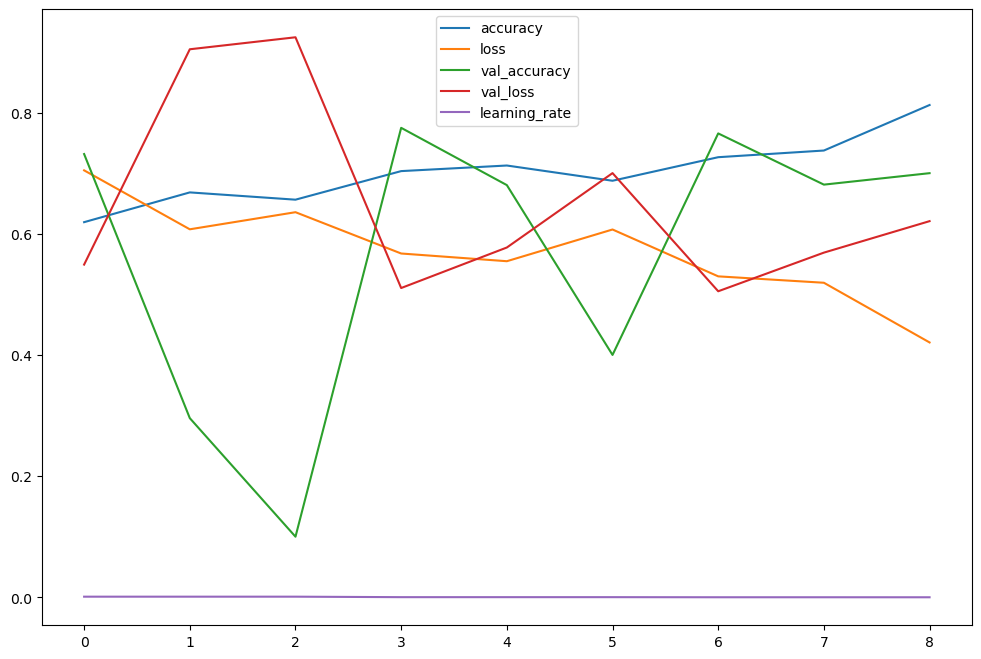

In [39]:
df=pd.DataFrame(results.history)
print(df)
df.plot(figsize=(12,8))
plt.show()

In [29]:
model.evaluate(test_image_gen)


313/313 ━━━━━━━━━━━━━━━━━━━━ 175s 558ms/step - accuracy: 0.7640 - loss: 0.5148


[0.5256409645080566, 0.7363054752349854]

In [30]:
pred = model.predict(test_image_gen)
pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 177s 564ms/step


array([[0.17538862],
       [0.12374453],
       [0.36137474],
       ...,
       [0.41230413],
       [0.7274469 ],
       [0.19030568]], dtype=float32)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      2501
           1       0.75      0.69      0.72      2501

    accuracy                           0.73      5002
   macro avg       0.73      0.73      0.73      5002
weighted avg       0.73      0.73      0.73      5002



<Axes: >

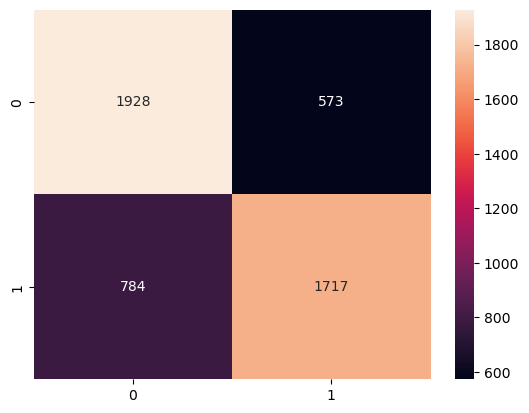

In [31]:
predtion = (pred > 0.5).astype(int)
predtion

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_image_gen.classes, predtion))

cm = confusion_matrix(test_image_gen.classes, predtion)

sns.heatmap(cm, annot=True, fmt='d')



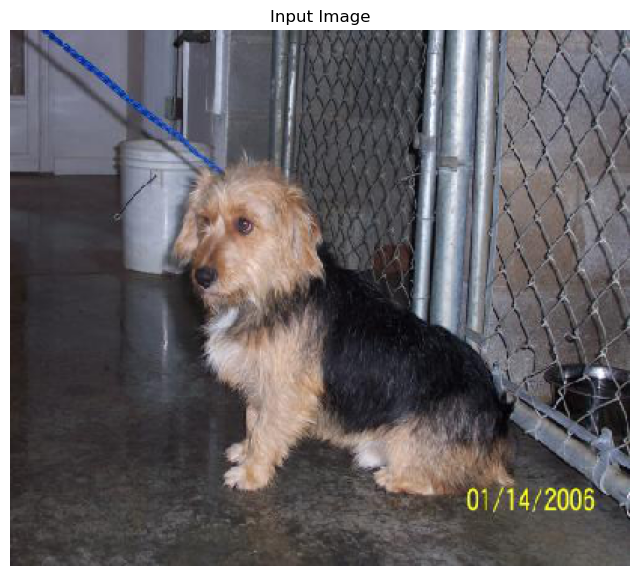

Image tensor shape: (1, 356, 412, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: Dog with 64.63% confidence


In [33]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
# Load and display the image
img_path = r'C:\Users\alira\Downloads\projects\PetImages\test\Dog\9930.jpg'
img = image.load_img(img_path, target_size=image_shape[:2])

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

# Convert image to tensor
img_tensor = image.img_to_array(img)

# Normalize image (scale to 0-1)
img_tensor = img_tensor / 255.0

# Add batch dimension
img_tensor = np.expand_dims(img_tensor, axis=0)

# Print shape (this is a statement, not a method call)
print("Image tensor shape:", img_tensor.shape)

# Make prediction
prediction = model.predict(img_tensor)

# Interpret result for binary classification
if prediction[0][0] > 0.5:
    result = "Dog"
    probability = prediction[0][0] * 100
else:
    result = "Cat"
    probability = (1 - prediction[0][0]) * 100

print(f"Prediction: {result} with {probability:.2f}% confidence")

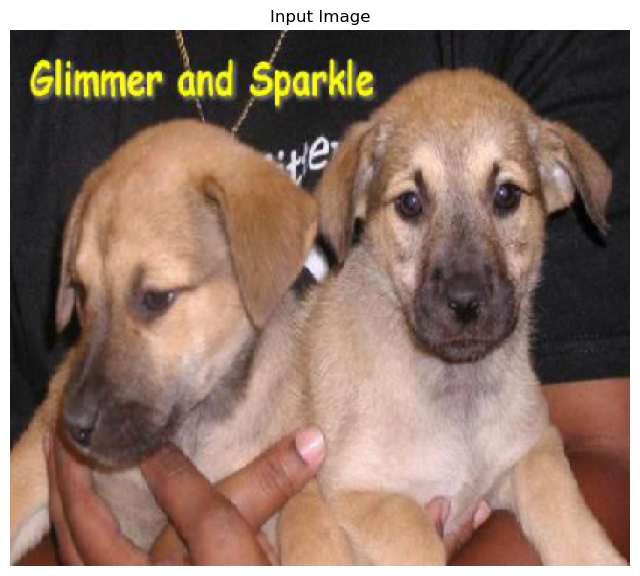

Image tensor shape: (1, 356, 412, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: Dog with 60.76% confidence


In [34]:
# Load and display the image
img_path = r"C:\Users\alira\Downloads\projects\PetImages\test\Dog\9846.jpg"
img = image.load_img(img_path, target_size=image_shape[:2])

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

# Convert image to tensor
img_tensor = image.img_to_array(img)

# Normalize image (scale to 0-1)
img_tensor = img_tensor / 255.0

# Add batch dimension
img_tensor = np.expand_dims(img_tensor, axis=0)

# Print shape (this is a statement, not a method call)
print("Image tensor shape:", img_tensor.shape)

# Make prediction
prediction = model.predict(img_tensor)

# Interpret result for binary classification
if prediction[0][0] > 0.5:
    result = "Dog"
    probability = prediction[0][0] * 100
else:
    result = "Cat"
    probability = (1 - prediction[0][0]) * 100

print(f"Prediction: {result} with {probability:.2f}% confidence")

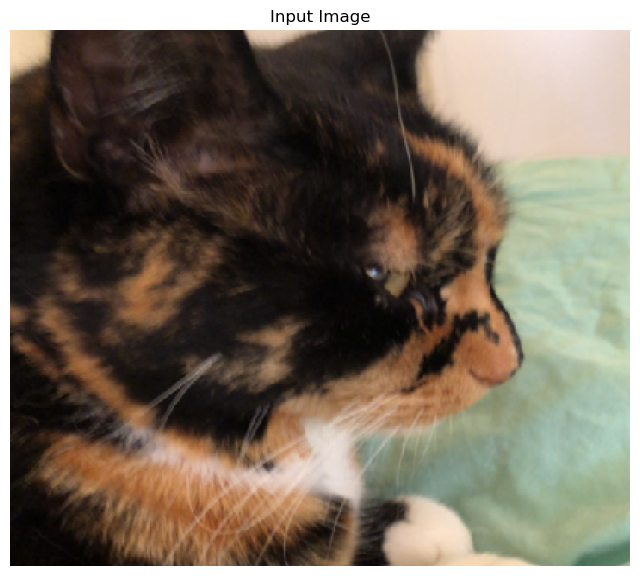

Image tensor shape: (1, 356, 412, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: Cat with 51.84% confidence


In [35]:
# Load and display the image
img_path = r"C:\Users\alira\Downloads\unnamed.png"
img = image.load_img(img_path, target_size=image_shape[:2])

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

# Convert image to tensor
img_tensor = image.img_to_array(img)

# Normalize image (scale to 0-1)
img_tensor = img_tensor / 255.0

# Add batch dimension
img_tensor = np.expand_dims(img_tensor, axis=0)

# Print shape (this is a statement, not a method call)
print("Image tensor shape:", img_tensor.shape)

# Make prediction
prediction = model.predict(img_tensor)

# Interpret result for binary classification
if prediction[0][0] > 0.5:
    result = "Dog"
    probability = prediction[0][0] * 100
else:
    result = "Cat"
    probability = (1 - prediction[0][0]) * 100

print(f"Prediction: {result} with {probability:.2f}% confidence")

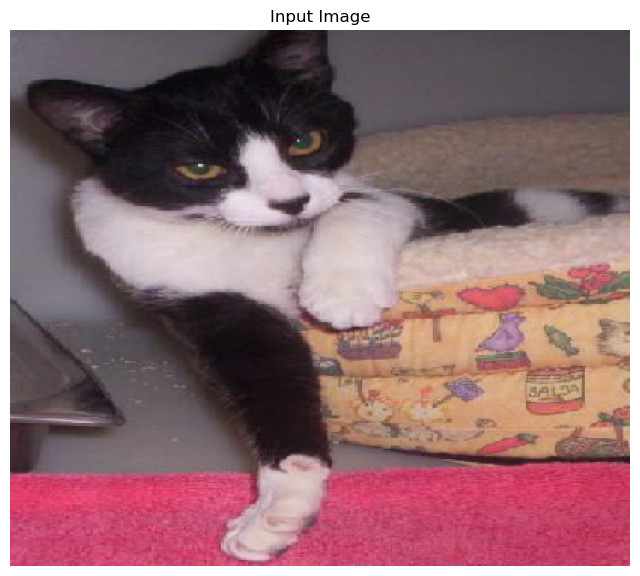

Image tensor shape: (1, 356, 412, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: Cat with 75.25% confidence


In [36]:
# Load and display the image
img_path = r"C:\Users\alira\Downloads\projects\PetImages\train\Cat\9908.jpg"
img = image.load_img(img_path, target_size=image_shape[:2])

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

# Convert image to tensor
img_tensor = image.img_to_array(img)

# Normalize image (scale to 0-1)
img_tensor = img_tensor / 255.0

# Add batch dimension
img_tensor = np.expand_dims(img_tensor, axis=0)

# Print shape (this is a statement, not a method call)
print("Image tensor shape:", img_tensor.shape)

# Make prediction
prediction = model.predict(img_tensor)

# Interpret result for binary classification
if prediction[0][0] > 0.5:
    result = "Dog"
    probability = prediction[0][0] * 100
else:
    result = "Cat"
    probability = (1 - prediction[0][0]) * 100

print(f"Prediction: {result} with {probability:.2f}% confidence")